In [2]:
#install the required packages
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#load in data
df = pd.read_csv('neuromap_data1-40.csv')

## DATA CLEARNING
#delete first 12 rows
df.drop(df.index[:12], inplace=True)

# # rename column questions to shorter
df.columns = ['timestamp','birth_year', 'birthplace', 'gender','undergrad_loc', 'undergrad_research',
            'masters_loc', 'masters_inst', 'masters_research','doctoral_loc', 'doctoral_inst', 'doctoral_research',
            'undergrad_inst', 'delete', 'ra_lm_loc', 'ra_lm_inst', 'ra_lm_research',
            'postdoc_loc' ,'postdoc_inst','postdoc_research', 'google_scholar', 'twitter', 'linkedin', 'github',
            'undergrad_ra_lm_exp','name','undergrad_deg','masters_qual', 'phd_qual', 'post_doc_qual', 'faculty_qual',
            'faculty_pos', 'prior_progr_lang','faculty_loc','faculty_inst', 'faculty_research', 'consent',
            'delete','delete', 'delete']

#remove unecessary colums
df= df.drop(['delete'], axis=1)

#view the first 10 rows of a specific column
doc_res = df.doctoral_research
doc_res.head(10)

12                     healthy, fmri, movement decoding
13    mild traumatic brain injury, TMS-EEG, neuropsy...
14    temporal, parietal areas; lesion analysis, fmr...
15    fMRI, vision, ventral stream, object perceptio...
16              development, psychosis, fMRI, thalamus 
17                     healthy, fMRI, movement decoding
18    adolescent decision-making, fMRI, reward proce...
19               aging and experiential decision making
20    MEG, fMRI, predictive-processing, schema proce...
21    neuroimaging, brain development, myelin, pytho...
Name: doctoral_research, dtype: object

In [5]:
#to check 
a = doc_res.unique()
b = len(doc_res.unique())
        
print (a,b)

['healthy, fmri, movement decoding'
 'mild traumatic brain injury, TMS-EEG, neuropsychology'
 'temporal, parietal areas; lesion analysis, fmri, stroke'
 'fMRI, vision, ventral stream, object perception, animacy'
 'development, psychosis, fMRI, thalamus '
 'healthy, fMRI, movement decoding'
 'adolescent decision-making, fMRI, reward processing, development, risk-taking'
 'aging and experiential decision making'
 'MEG, fMRI, predictive-processing, schema processing, episodic memory'
 'neuroimaging, brain development, myelin, python, BrainVISA'
 'Autism, multimodal imaging, thalamus, neuropsychology'
 'communication, naturalistic, human fMRI,  neural synchrony'
 'molucular dynamics simulation analysis'
 'large-scale brain network variability wrt ovarian hormones'
 'Functional connectivity/Resting state/ Default mode network/Mind wandering/'
 'Decision Making, fMRI, Behavioural Modelling'
 'addiction, mood disorders, adolescent development, MRI, diffusion imaging'
 'medial prefrontal corte

In [64]:
text=" ".join(str(dscp) for dscp in doc_res)
#text

'healthy, fmri, movement decoding mild traumatic brain injury, TMS-EEG, neuropsychology temporal, parietal areas; lesion analysis, fmri, stroke fMRI, vision, ventral stream, object perception, animacy development, psychosis, fMRI, thalamus  healthy, fMRI, movement decoding adolescent decision-making, fMRI, reward processing, development, risk-taking aging and experiential decision making MEG, fMRI, predictive-processing, schema processing, episodic memory neuroimaging, brain development, myelin, python, BrainVISA Autism, multimodal imaging, thalamus, neuropsychology communication, naturalistic, human fMRI,  neural synchrony molucular dynamics simulation analysis large-scale brain network variability wrt ovarian hormones Functional connectivity/Resting state/ Default mode network/Mind wandering/ Decision Making, fMRI, Behavioural Modelling addiction, mood disorders, adolescent development, MRI, diffusion imaging medial prefrontal cortex, development, self-protection, social evaluation, 

In [65]:
#?WordCloud

text=" ".join(str(dscp) for dscp in doc_res)
print ("{} words in all combined review.".format(len(text)))

stopwords=set(STOPWORDS)
stopwords.update(["in","along","and","making"])


2117 words in all combined review.


In [66]:
#Values of 255 are pure white, whereas values of 1 are black. 
#Use the function below to transform mask if the mask has the same format as above. Notice if you have a mask that the background is not 0, but 1 or 2, adjust the function to match your mask.

def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [67]:
head_mask = np.array(Image.open("img/head.png"))
head_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [68]:
# Transform your mask into a new one that will work with the function:
tf_head_mask = np.ndarray((head_mask.shape[0],head_mask.shape[1]), np.int32)

for i in range(len(head_mask)):
    tf_head_mask[i] = list(map(transform_format, head_mask[i]))
    
tf_head_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

(-0.5, 685.5, 755.5, -0.5)

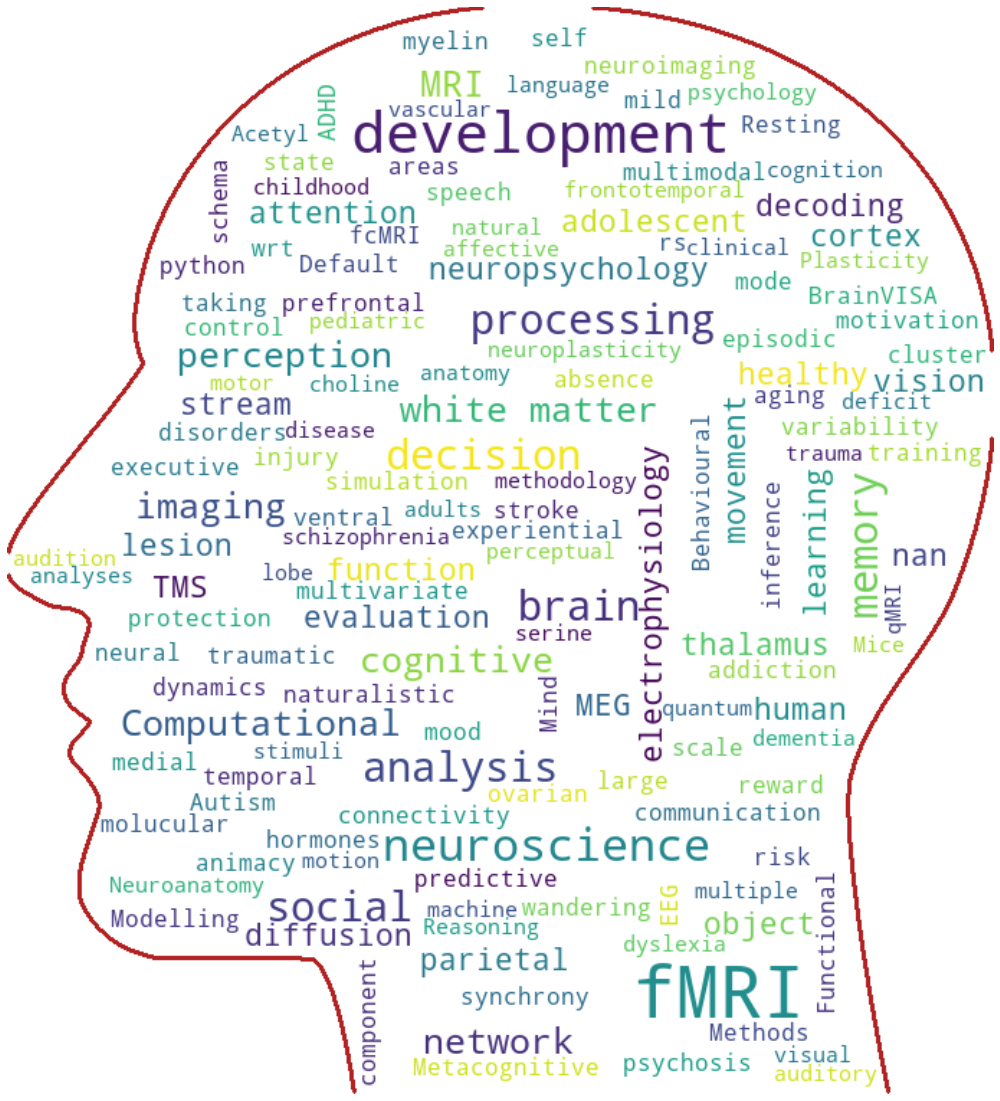

In [69]:

# Create and generate a word cloud image:
wdcd = WordCloud(mask=tf_head_mask, stopwords=stopwords, max_font_size=50, max_words=1000, background_color="white", contour_width=3, contour_color='firebrick')
wdcd.generate(text)

# Display the generated image:
plt.figure(figsize=[40,20])
plt.imshow(wdcd, interpolation='bilinear')
plt.axis("off")


# Save the image in the img folder:
#wordcloud.to_file("img/first_review.png")

In [72]:
brain_mask = np.array(Image.open("img/brain.png"))
brain_mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [59]:
# Transform your mask into a new one that will work with the function:
#tf_brain_mask = np.ndarray((brain_mask.shape[0],brain_mask.shape[1]), np.int32)

#for i in range(len(brain_mask)):
#    tf_brain_mask[i] = list(map(transform_format, brain_mask[i]))
    
#tf_brain_mask

(-0.5, 688.5, 588.5, -0.5)

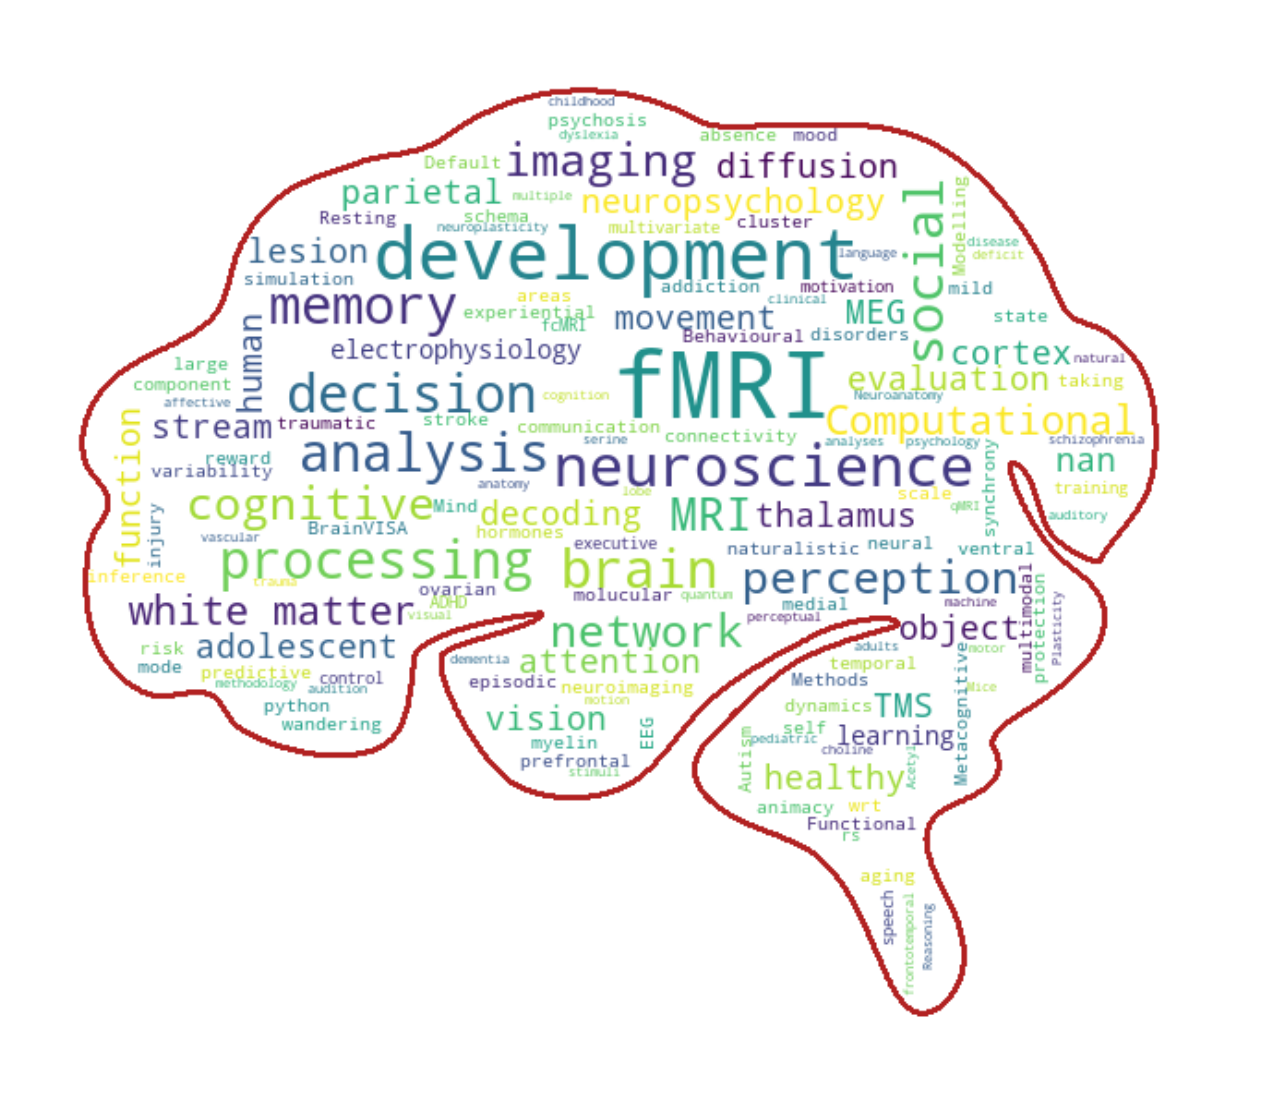

In [73]:

# Create and generate a word cloud image:
wdcd = WordCloud(mask=brain_mask, stopwords=stopwords, max_font_size=50, max_words=1000, background_color="white", contour_width=3, contour_color='firebrick')
wdcd.generate(text)

# Display the generated image:
plt.figure(figsize=[40,20])
plt.imshow(wdcd, interpolation='bilinear')
plt.axis("off")


# Save the image in the img folder:
#wordcloud.to_file("img/first_review.png")